### Name : Shobhit Mirjankar
### Batch : C32
### Roll No : 1902101

In [14]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [15]:
# Displaying the Dataset

dataset = pd.read_csv('tvmarketing.csv')
dataset

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


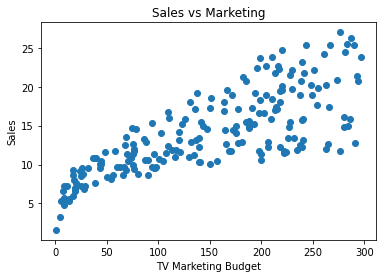

In [16]:
# Visualizing data using Scatterplot

X = dataset['TV']
y = dataset['Sales']
plt.scatter(X,y)
plt.title('Sales vs Marketing')
plt.xlabel('TV Marketing Budget')
plt.ylabel('Sales')
plt.show()

In [17]:
# Split dataset into train and test set

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=13)
X_train

125     87.2
68     237.4
69     216.8
108     13.1
131    265.2
       ...  
98     289.7
16      67.8
74     213.4
176    248.4
82      75.3
Name: TV, Length: 160, dtype: float64

## Simple Linear Regression - Analytical Method 

In [18]:
# Simple Linear Regression - Analytical Method - Train and Test

def calculate_b1(X,y):
    return np.dot((X-np.mean(X)),(y-np.mean(y)))/np.sum(np.square(X-np.mean(X)));

def calculate_b0(X,y,b1):
    return (np.mean(y) - (b1*np.mean(X)))

def predict(X,b0,b1):
    return (b0 + (b1*X))

b1 = calculate_b1(X_train,y_train)
b0 = calculate_b0(X_train,y_train,b1)
print('B0 (intercept) = ',b0)
print('B1 (slope) = ',b1)

y_pred_analytical = predict(X_test,b0,b1)

results = pd.DataFrame({'Actual':y_test,'Analytical':y_pred_analytical})
results

B0 (intercept) =  7.230328663758761
B1 (slope) =  0.04634776283125915


,Actual,Analytical
179,12.6,14.905518
155,3.2,7.420354
23,15.5,17.811523
159,12.9,13.334329
96,11.7,16.388647
198,25.5,20.374554
42,20.7,20.838032
110,13.4,17.695654
128,24.7,17.440741
97,15.5,15.800030


In [19]:
# Simple Linear Regression - Analytical Method - Prediction

X_ip = float(input('Enter value of marketing budget : '))
print('Predicted Sales value is : ',predict(X_ip,b0,b1))

Enter value of marketing budget : 40.5
Predicted Sales value is :  9.107413058424756


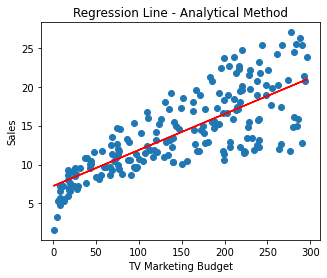

In [20]:
# Simple Linear Regression - Analytical Method - Regression Line

plt.figure(figsize=(5, 4))
ax = plt.axes()
ax.scatter(X,y)
ax.plot(X,predict(X,b0,b1),color='red')
plt.title('Regression Line - Analytical Method')
ax.set_xlabel('TV Marketing Budget')
ax.set_ylabel('Sales')
plt.show()

Interpretation of Results : Thus the relationship between marketing and sales is positive and for every 1 unit of increase in marketing budget, the sales increases by b1 = 0.0463

## Simple Linear Regression - SGD Method 

In [21]:
# Displaying X and Y values used for training

print('X')
print(X_train)
print()
print('Y')
print(y_train)

X
125     87.2
68     237.4
69     216.8
108     13.1
131    265.2
       ...  
98     289.7
16      67.8
74     213.4
176    248.4
82      75.3
Name: TV, Length: 160, dtype: float64

Y
125    10.6
68     18.9
69     22.3
108     5.3
131    12.7
       ... 
98     25.4
16     12.5
74     17.0
176    20.2
82     11.3
Name: Sales, Length: 160, dtype: float64


In [22]:
# Initialize parameters b0, b1

b0 = 0
b1 = 0

In [23]:
# Calculate cost function

def calculate_cost(y,y_pred):
    return np.sum(np.square(y-y_pred))

In [24]:
# Calculate gradient of cost function

def calculate_gradient(X,y,y_pred):
    db0 = (-2)*(np.sum(y-y_pred))
    db1 = (-2)*(np.dot(X,y-y_pred))
    return db0,db1

In [25]:
# Simple Linear Regression - SGD

def predict(X,b0,b1):
    return (b0 + (b1*X))

def fit(X,y,b0=0,b1=0,learning_rate=0.00001,epochs=2):
    b0 = 0
    b1 = 0
    cost = []
    for epoch in range(1,epochs+1):
        count = 0
        for i in X.index:
            y_pred = predict(X[i],b0,b1)
            y_actual = y[i]
            J = calculate_cost(y_actual,y_pred)
            cost.append(J)
            print('Epoch: ',epoch,', Iteration: ',count+1,', Cost Function Value (J) = ',J)
            db0,db1 = calculate_gradient(X[i],y_actual,y_pred)
            b0 = b0 - (learning_rate*db0)
            b1 = b1 - (learning_rate*db1)
            count = (count+1)%len(X)
    return b0,b1,cost

b0,b1,cost = fit(X_train,y_train,b0,b1)

Epoch:  1 , Iteration:  1 , Cost Function Value (J) =  112.36
Epoch:  1 , Iteration:  2 , Cost Function Value (J) =  210.5725061396848
Epoch:  1 , Iteration:  3 , Cost Function Value (J) =  11.251934700479284
Epoch:  1 , Iteration:  4 , Cost Function Value (J) =  15.714485766440342
Epoch:  1 , Iteration:  5 , Cost Function Value (J) =  213.39001487441027
Epoch:  1 , Iteration:  6 , Cost Function Value (J) =  244.58245087532657
Epoch:  1 , Iteration:  7 , Cost Function Value (J) =  6.798992300580298
Epoch:  1 , Iteration:  8 , Cost Function Value (J) =  7.655698842229168
Epoch:  1 , Iteration:  9 , Cost Function Value (J) =  48.1211301450999
Epoch:  1 , Iteration:  10 , Cost Function Value (J) =  6.147482116431189
Epoch:  1 , Iteration:  11 , Cost Function Value (J) =  7.380388811805911
Epoch:  1 , Iteration:  12 , Cost Function Value (J) =  12.717258793809124
Epoch:  1 , Iteration:  13 , Cost Function Value (J) =  34.65924465389198
Epoch:  1 , Iteration:  14 , Cost Function Value (J) =

Epoch:  2 , Iteration:  99 , Cost Function Value (J) =  147.53392417847564
Epoch:  2 , Iteration:  100 , Cost Function Value (J) =  35.92381987499596
Epoch:  2 , Iteration:  101 , Cost Function Value (J) =  18.198670612934787
Epoch:  2 , Iteration:  102 , Cost Function Value (J) =  84.34509186779727
Epoch:  2 , Iteration:  103 , Cost Function Value (J) =  2.4256754590596983
Epoch:  2 , Iteration:  104 , Cost Function Value (J) =  121.76662615846445
Epoch:  2 , Iteration:  105 , Cost Function Value (J) =  14.065796027669327
Epoch:  2 , Iteration:  106 , Cost Function Value (J) =  3.7461162378264543
Epoch:  2 , Iteration:  107 , Cost Function Value (J) =  11.66043631700159
Epoch:  2 , Iteration:  108 , Cost Function Value (J) =  40.273822950511395
Epoch:  2 , Iteration:  109 , Cost Function Value (J) =  23.56357720610005
Epoch:  2 , Iteration:  110 , Cost Function Value (J) =  6.555801554394425
Epoch:  2 , Iteration:  111 , Cost Function Value (J) =  152.46212541011215
Epoch:  2 , Iterat

In [26]:
# Simple Linear Regression - SGD - Prediction

print('B0 (intercept) = ',b0)
print('B1 (slope) = ',b1)

y_pred_sgd = predict(X_test,b0,b1)

results['SGD'] = y_pred_sgd
results

B0 (intercept) =  0.012963678644417758
B1 (slope) =  0.08917508066653065


,Actual,Analytical,SGD
179,12.6,14.905518,14.780357
155,3.2,7.420354,0.378582
23,15.5,17.811523,20.371635
159,12.9,13.334329,11.757322
96,11.7,16.388647,17.633960
198,25.5,20.374554,25.303017
42,20.7,20.838032,26.194767
110,13.4,17.695654,20.148697
128,24.7,17.440741,19.658234
97,15.5,15.800030,16.501436


In [27]:
# Simple Linear Regression - SGD - Prediction

X_ip = float(input('Enter value of marketing budget : '))
print('Predicted Sales value is : ',predict(X_ip,b0,b1))

Enter value of marketing budget : 40.5
Predicted Sales value is :  3.624554445638909


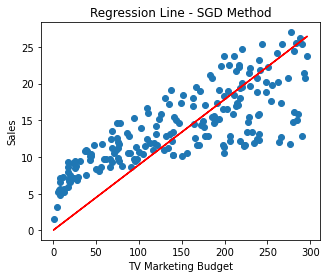

In [28]:
# Simple Linear Regression - SGD - Regression Line

plt.figure(figsize=(5, 4))
ax = plt.axes()
ax.scatter(X,y)
ax.plot(X,predict(X,b0,b1),color='red')
plt.title('Regression Line - SGD Method')
ax.set_xlabel('TV Marketing Budget')
ax.set_ylabel('Sales')
plt.show()

Interpretation of Results : Thus the relationship between marketing and sales is positive and for every 1 unit of increase in marketing budget, the sales increases by b1 = 0.0892